# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

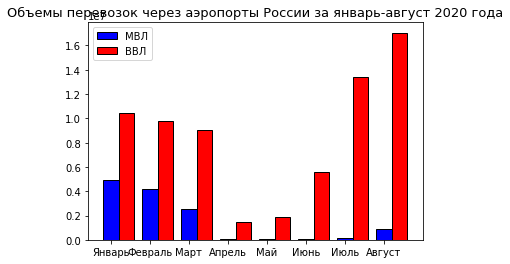

In [47]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

df_av_trans = pd.read_csv('avia_trans_volume.csv')
df_airp_pas = pd.read_csv('airports_passengers.csv')

df_av_trans[['МВЛ','ВВЛ']]

plt.title('A Multiseries Bar Chart', fontsize=20)
bw = 0.4
x = pd.Series(range(0, 8))
plt.bar(x,    df_av_trans['МВЛ'], bw, color = 'blue', edgecolor = 'black', label = 'МВЛ')
plt.bar(x+bw, df_av_trans['ВВЛ'], bw, color = 'red',  edgecolor = 'black', label = 'ВВЛ')
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
plt.xticks(x, df_av_trans['Период'])
plt.legend(loc=2)

plt.show()

# sns.distplot(df_av_trans['Период'], hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

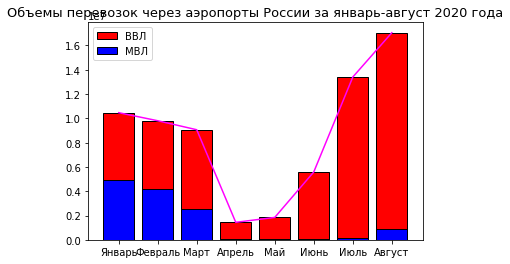

In [52]:
#df_airp_pas
plt.bar(x, df_av_trans['ВВЛ'], color = 'red',  edgecolor = 'black', label = 'ВВЛ')
plt.bar(x, df_av_trans['МВЛ'], color = 'blue', edgecolor = 'black', label = 'МВЛ')
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
plt.xticks(x, df_av_trans['Период'])
plt.legend(loc=2)

plt.plot(df_av_trans['ВВЛ'], color = 'magenta', label = 'ВВЛ')
plt.show()


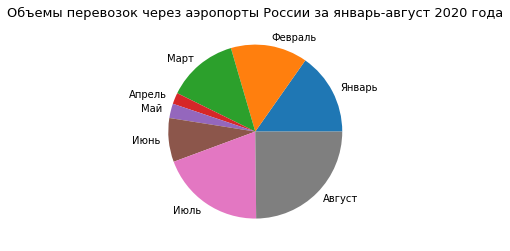

In [64]:
plt.pie(df_av_trans['ВВЛ'], labels=df_av_trans['Период'])
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
#plt.pie(df_av_trans['МВЛ'], labels=df_av_trans['Период'])
#plt.legend(loc=6)
plt.show()